# Data analysis across scientific papers related to the tens rule hypothesis

## Tens rule hypothesis: Approximately 10% of species successfully take consecutive steps of the invasion process

## 1. Import the required libraries

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
from orkg import ORKG
from bokeh.io import export_png
from bokeh.models import ColumnDataSource,LabelSet, HoverTool, WheelZoomTool, ResetTool, SaveTool, PanTool, DatetimeTickFormatter, Whisker
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import cumsum
from bokeh.palettes import Category10



import matplotlib.pyplot as plt

from math import pi

import os
import re
output_notebook()

Loading BokehJS ...

## 2. Connect to ORKG and import the tens rule comparison table

In [2]:
orkg = ORKG(host='https://orkg.org/orkg', simcomp_host='https://orkg.org/orkg/simcomp')

df = orkg.contributions.compare_dataframe(comparison_id='R57101')
df = df.T
df=df.rename(columns={'stand of hypothesis':'stand'})
#df

# 3. Preprocess the data

In [3]:
# put the titles of the papers in a column named "study"
df['study']=df.iloc[:, 0]
df = df.reset_index()
# rename columns
#df.rename(columns={' Phenotypic plasticity form': 'Phenotypic plasticity form'}, inplace=True)
df

,index,Research Method,Continent,hypothesis,stand,type of experiment,Habitat,Investigated species,Number of species,has research problem,Transition in the invasion process,Observed proportion of species making the transition,Study date,same as,study
0,Fish and ships: relating dispersal frequency t...,Observational or correlational,North America,Tens rule,Questioned,Field,Marine,Fishes,32,Testing the tens rule hypothesis in invasion b...,Introduction -> Establishment,"75,0%",2000,https://sws.geonames.org/6255149//https://www....,Observational or correlational
1,The varying success of invaders/Contribution 4,Observational or correlational,Europe/North America,Tens rule,Undecided,Field,Terrestrial,Plants,71,Testing the tens rule hypothesis in invasion b...,Introduction -> Impact/pest species,"4,2%",1996,https://sws.geonames.org/6255148//https://www....,Observational or correlational
2,The varying success of invaders/Contribution 3,Observational or correlational,Europe/North America,Tens rule,Supported,Field,Terrestrial,Plants,22,Testing the tens rule hypothesis in invasion b...,Establishment -> Impact/pest species,"17,0%",1996,https://sws.geonames.org/6255148//https://www....,Observational or correlational
3,The varying success of invaders/Contribution 2,Observational or correlational,Europe/North America,Tens rule,Questioned,Field,Terrestrial,Plants;Birds;Mammals,166,Testing the tens rule hypothesis in invasion b...,Introduction -> Establishment,"53,6%",1996,https://sws.geonames.org/6255148//https://www....,Observational or correlational
4,The varying success of invaders/Contribution 1,Observational or correlational,Europe,Tens rule,Supported,Field,Terrestrial,Plants,120,Testing the tens rule hypothesis in invasion b...,Transport -> Introduction,"17,2%",1996,https://sws.geonames.org/6255148//https://www....,Observational or correlational
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Predicting establishment success for alien rep...,Observational or correlational,Europe/North America,Tens rule,Questioned,Field,Terrestrial and freshwater,Amphibians and reptiles,193,Testing the tens rule hypothesis in invasion b...,Introduction -> Establishment,"34,4%",2009,https://sws.geonames.org/6255148//https://www....,Observational or correlational
98,Determinants of establishment success for intr...,Observational or correlational,Europe/Oceania,Tens rule,Questioned,Field,Terrestrial,Mammals,104,Testing the tens rule hypothesis in invasion b...,Introduction -> Establishment,"64,8%",2009,https://sws.geonames.org/6255148//https://www....,Observational or correlational
99,The potential impact of the New Zealand flatwo...,Observational or correlational,Europe,Tens rule,Undecided,Field,Terrestrial,Other invertebrates,12,Testing the tens rule hypothesis in invasion b...,Introduction -> Impact/pest species,"8,3%",2001,https://sws.geonames.org/6255148//https://www....,Observational or correlational
100,Biological control attempts by introductions a...,Observational or correlational,North America,Tens rule,Questioned,Field,Terrestrial,Insects,159,Testing the tens rule hypothesis in invasion b...,Introduction -> Establishment,"27,7%",1975,https://sws.geonames.org/6255149//https://www....,Observational or correlational


In [4]:
# a row is duplicated, This command should be deleted when the contribution is deleted in orkg
#df = df.drop(df.index[[26]])
#df = df.reset_index()
#df

### The main hypothesis is divided into 2 sub hypotheses according to the transition in the invasion process.

## 4.  Analytical questions

## Question 1: How many research contributions have discussed this hypothesis? How many contributions support, are undecided, or question the hypothesis?

### The main hypothesis

In [5]:
df_stand = df.value_counts(['stand']).reset_index(name='count')
df_stand

,stand,count
0,Questioned,65
1,Supported,27
2,Undecided,10


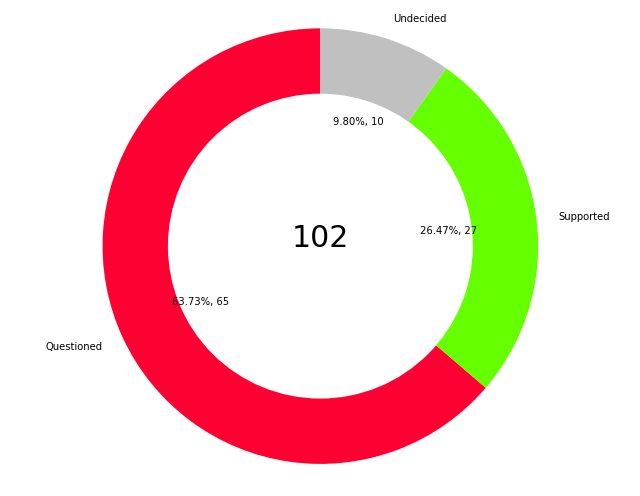

In [6]:
# With matplotlib
labels = np.array(df_stand["stand"]).astype(str)
sizes = np.array(df_stand["count"]).astype(int) 
colors = ['#FF0033','#66FF00','#C0C0C0']




fig1, ax1 = plt.subplots(figsize=(9, 7))
#patches, texts, autotexts = 
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"102", ha='center',fontsize=30)
#plt.title("Tens rule Hypothesis",fontsize=20)
#autotexts[0].set_fontsize(15)
#texts[0].set_fontsize(15)
#texts[2].set_fontsize(15)

plt.rcParams.update({'font.size': 15})

plt.savefig("img/main_hyp.png")

plt.show()


## Question 2: How many contributions have discussed each sub-hypotheses? How many contributions support, are undecided, or question each sub-hypothesis?

### The first sub hypothesis considers the folowing transitions in the invasion process: Introduction -> Establishment, Establishment -> Spread, Transport ->Introduction

In [7]:
df_number = df[~df['Transition in the invasion process'].str.contains('Impact')]
#df_number = df[df['Transition in the invasion process']=='Total number released']

df_number_grouped = df_number.value_counts(['stand']).reset_index(name='count')
df_number_grouped 

,stand,count
0,Questioned,48
1,Supported,16
2,Undecided,2


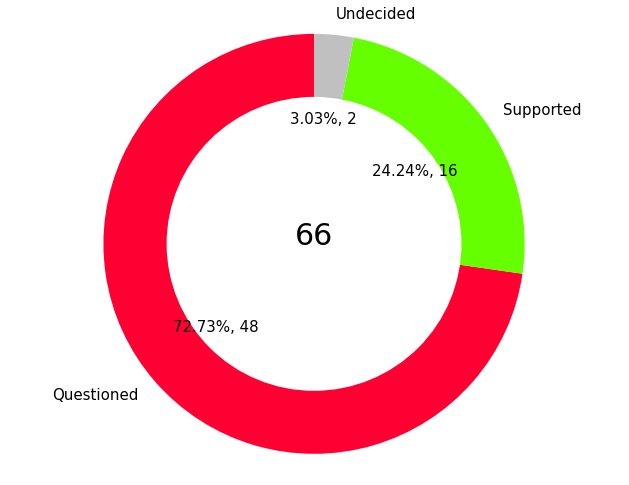

In [8]:
labels = np.array(df_number_grouped["stand"]).astype(str)
sizes = np.array(df_number_grouped["count"]).astype(int) 
colors = ['#FF0033','#66FF00','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"66", ha='center',fontsize=30)
#plt.title("Invasion tens rule",fontsize=25)
plt.rcParams.update({'font.size': 15})

plt.savefig("img/hyp1.png")


plt.show()

### The first sub hypothesis considers the folowing transitions in the invasion process: Introduction -> Impact, Establishment -> Impact

In [9]:
df_size = df[df['Transition in the invasion process'].str.contains('Impact')]
df_size_grouped = df_size.value_counts(['stand']).reset_index(name='count')
df_size_grouped 

,stand,count
0,Questioned,17
1,Supported,11
2,Undecided,8


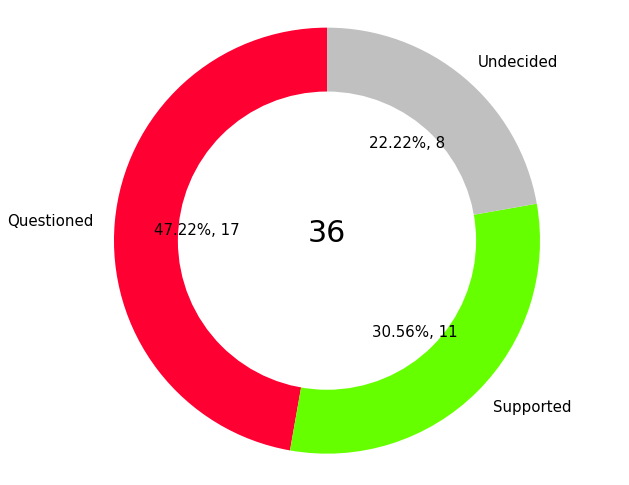

In [10]:
labels = np.array(df_size_grouped["stand"]).astype(str)
sizes = np.array(df_size_grouped["count"]).astype(int) 
colors = ['#FF0033','#66FF00','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"36", ha='center',fontsize=30)
#plt.title("Impact tens rule",fontsize=20)
plt.rcParams.update({'font.size': 15})

plt.savefig("img/hyp2.png")


plt.show()

## The hierarchy of the hypothesis: Create a graph visualization of the main and sub hypotheses and save it in a pdf file (the pdf file is already created in 'img' folder).

In [11]:
from graphviz import Digraph
g = Digraph('G', filename='img/tens_rule.gv')
g.edge('A', 'B')
g.edge('A', 'C')
g.node('A', shape='none',label="", image="main_hyp.PNG")
g.node('B', shape='none',label="", image="hyp1.PNG")
g.node('C', shape='none',label="", image="hyp2.PNG")
g.view()

'img\\tens_rule.gv.pdf'

## Show the graph visualizaion here in the notebook

In [12]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('img/tens_rule.gv.pdf',size=(1000,950))

## To test the hypothesis, some articles investigated plant taxa while others investigated non-plant taxa such as birds, reptiles, etc

## We first look at the articles that investigated plant taxa

## Question 3: How many plant taxa did each article investigate? Which articles investigated the highest numbers of plant taxa?

In [13]:
df['Number of species'] = df['Number of species'].astype(int)

In [14]:
df_plants = df[df['Investigated species']=='Plants']
df_plants

,index,Research Method,Continent,hypothesis,stand,type of experiment,Habitat,Investigated species,Number of species,has research problem,Transition in the invasion process,Observed proportion of species making the transition,Study date,same as,study
1,The varying success of invaders/Contribution 4,Observational or correlational,Europe/North America,Tens rule,Undecided,Field,Terrestrial,Plants,71,Testing the tens rule hypothesis in invasion b...,Introduction -> Impact/pest species,"4,2%",1996,https://sws.geonames.org/6255148//https://www....,Observational or correlational
2,The varying success of invaders/Contribution 3,Observational or correlational,Europe/North America,Tens rule,Supported,Field,Terrestrial,Plants,22,Testing the tens rule hypothesis in invasion b...,Establishment -> Impact/pest species,"17,0%",1996,https://sws.geonames.org/6255148//https://www....,Observational or correlational
4,The varying success of invaders/Contribution 1,Observational or correlational,Europe,Tens rule,Supported,Field,Terrestrial,Plants,120,Testing the tens rule hypothesis in invasion b...,Transport -> Introduction,"17,2%",1996,https://sws.geonames.org/6255148//https://www....,Observational or correlational
5,The analysis and modelling of British invasion...,Observational or correlational,Europe,Tens rule,Undecided,Field,Terrestrial and freshwater,Plants,1058,Testing the tens rule hypothesis in invasion b...,Introduction -> Impact/pest species,"6,8%",1986,https://sws.geonames.org/6255148//https://www....,Observational or correlational
8,"Invaders, weeds and the risk from genetically ...",Observational or correlational,Europe,Tens rule,Supported,Field,Terrestrial,Plants,210,Testing the tens rule hypothesis in invasion b...,Introduction -> Impact/pest species,"2,4%",1993,https://sws.geonames.org/6255148//https://www....,Observational or correlational
9,"Invaders, weeds and the risk from genetically ...",Observational or correlational,Europe,Tens rule,Supported,Field,Terrestrial,Plants,210,Testing the tens rule hypothesis in invasion b...,Establishment -> Impact/pest species,"18,6%",1993,https://sws.geonames.org/6255148//https://www....,Observational or correlational
10,"Invaders, weeds and the risk from genetically ...",Observational or correlational,Europe,Tens rule,Supported,Field,Terrestrial,Plants,1642,Testing the tens rule hypothesis in invasion b...,Introduction -> Establishment,"12,8%",1993,https://sws.geonames.org/6255148//https://www....,Observational or correlational
11,"Invaders, weeds and the risk from genetically ...",Observational or correlational,Europe,Tens rule,Supported,Field,Terrestrial,Plants,12507,Testing the tens rule hypothesis in invasion b...,Transport -> Introduction,"13,5%",1993,https://sws.geonames.org/6255148//https://www....,Observational or correlational
12,Plant introductions in Australia: how can we r...,Observational or correlational,Oceania,Tens rule,Supported,Field,Terrestrial,Plants,2800,Testing the tens rule hypothesis in invasion b...,Establishment -> Impact/pest species,"12,1%",2004,https://sws.geonames.org/6255151//https://www....,Observational or correlational
17,How well do we understand the impacts of alien...,Observational or correlational,Europe,Tens rule,Undecided,Field,Terrestrial,Plants,5789,Testing the tens rule hypothesis in invasion b...,Introduction -> Impact/pest species,"5,6%",2010,https://sws.geonames.org/6255148//https://www....,Observational or correlational


In [15]:
dates = np.array(df_plants['Study date'])
dates

array(['1996', '1996', '1996', '1986', '1993', '1993', '1993', '1993',
       '2004', '2010', '2005', '1993', '2012', '2012', '2012', '2012',
       '2009', '2008', '2008', '2008', '2008', '2008', '2008', '2008',
       '2006', '2006', '2006', '1995', '2014', '2012', '2001', '2001',
       '2014', '2009', '2009'], dtype=object)

In [16]:
plants = np.array(df_plants['Number of species'])
plants

array([   71,    22,   120,  1058,   210,   210,  1642, 12507,  2800,
        5789,   828,   242,  1104,   257,   257,  1104,  1903,   232,
         787,   709,   545,   412,  1969,  1086,    54,    57,   180,
        2645,    27,    96,    68,    58,   139,   214,   214])

In [17]:
studies = np.array(df_plants['index'])
stand_of = np.array(df_plants['stand'])

In [18]:
df9 = pd.DataFrame(data=dict( stud=studies,dates=dates,value=plants,stand=stand_of))

hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Stand of hypothesis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
         '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df9)
p = figure(x_range= studies,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of plant taxa',
     #     title="Number of plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'


show(p)

In [19]:
export_png(p, filename='img/plant.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\tens_rule\\img\\plant.png'

In [20]:
df_plants_top = df_plants.sort_values(by=['Number of species'],ascending=False)
df_plants_top = df_plants_top.head(10)
df_plants_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 11 to 59
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   index                                                 10 non-null     object
 1   Research Method                                       10 non-null     object
 2   Continent                                             10 non-null     object
 3   hypothesis                                            10 non-null     object
 4   stand                                                 10 non-null     object
 5   type of experiment                                    10 non-null     object
 6   Habitat                                               10 non-null     object
 7   Investigated species                                  10 non-null     object
 8   Number of species                                     10 non-null     i

In [21]:
dates = np.array(df_plants_top['Study date'])
plants = np.array(df_plants_top['Number of species'])
studies = np.array(df_plants_top['index'])
stand_of = np.array(df_plants_top['stand'])

In [22]:
df99 = pd.DataFrame(data=dict( stud=studies,dates=dates,value=plants,stand=stand_of))

hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Stand of hypothesis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
         '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df9)
p = figure(x_range= studies,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of plant taxa',
     #     title="Number of plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'
#p.xaxis.major_label_orientation = pi/50

show(p)

In [23]:
export_png(p, filename='img/plant_top.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\tens_rule\\img\\plant_top.png'

## Now we look at the non-plant taxa

## Question 4: How many non-plant taxa did each article investigate? Which articles investigated the highest numbers of non-plant taxa?

In [24]:
df_other = df[df['Investigated species']!='Plants']
#df_other

In [25]:
#df_other['Study date'] = pd.to_datetime(df_other['Study date'].astype(str), format='%Y')
dates_other = np.array(df_other['Study date']).astype(str)
dates_other

array(['2000', '1996', '1986', '1986', '2010', '2010', '2010', '2010',
       '1996', '2015', '2013', '2005', '2005', '2000', '2000', '1991',
       '1992', '1999', '1999', '2008', '2008', '2008', '2008', '2005',
       '2005', '2005', '2010', '2006', '1993', '1993', '1993', '2007',
       '2007', '2007', '1995', '2005', '2010', '2002', '2002', '2005',
       '2005', '2005', '2008', '2008', '1997', '2012', '2012', '2005',
       '2004', '2004', '2001', '2001', '1997', '2006', '2007', '2004',
       '2004', '2004', '1996', '1995', '2006', '2002', '2009', '2009',
       '2001', '1975', '2006'], dtype='<U4')

In [26]:
df_other = df[df['Investigated species']!='Plants']
#df_other

#df_other['Study date'] = pd.to_datetime(df_other['Study date'].astype(str), format='%Y')
dates_other = np.array(df_other['Study date']).astype(str)
dates_other

array(['2000', '1996', '1986', '1986', '2010', '2010', '2010', '2010',
       '1996', '2015', '2013', '2005', '2005', '2000', '2000', '1991',
       '1992', '1999', '1999', '2008', '2008', '2008', '2008', '2005',
       '2005', '2005', '2010', '2006', '1993', '1993', '1993', '2007',
       '2007', '2007', '1995', '2005', '2010', '2002', '2002', '2005',
       '2005', '2005', '2008', '2008', '1997', '2012', '2012', '2005',
       '2004', '2004', '2001', '2001', '1997', '2006', '2007', '2004',
       '2004', '2004', '1996', '1995', '2006', '2002', '2009', '2009',
       '2001', '1975', '2006'], dtype='<U4')

In [27]:
species_other = np.array(df_other['Investigated species'])
stand_of_other = np.array(df_other['stand'])

In [28]:
number_other = np.array(df_other['Number of species'])
studies_other = np.array(df_other['index'])
#palette = ['#FA8072','#006666','#60d4cb','#ee4d2e','#efd566','#00ffbf','#8000ff','#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#efbaca']

In [29]:
df10 = pd.DataFrame(data=dict(stud=studies_other,dates=dates_other,value=number_other,species=species_other,stand=stand_of_other))
df10

,stud,dates,value,species,stand
0,Fish and ships: relating dispersal frequency t...,2000,32,Fishes,Questioned
1,The varying success of invaders/Contribution 2,1996,166,Plants;Birds;Mammals,Questioned
2,The analysis and modelling of British invasion...,1986,474,Plants;Crustaceans;Insects;Molluscs;Birds;Mamm...,Questioned
3,The analysis and modelling of British invasion...,1986,1058,Plants;Crustaceans;Insects;Molluscs;Birds;Mamm...,Questioned
4,How well do we understand the impacts of alien...,2010,1071,,Questioned
...,...,...,...,...,...
62,Predicting establishment success for alien rep...,2009,193,Amphibians and reptiles,Questioned
63,Determinants of establishment success for intr...,2009,104,Mammals,Questioned
64,The potential impact of the New Zealand flatwo...,2001,12,Other invertebrates,Undecided
65,Biological control attempts by introductions a...,1975,159,Insects,Questioned


In [30]:
hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Investigated taxon', '@species'),
        ('Stand of hypothsis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
        '@{species}' : 'printf',
        '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df10)
p = figure(x_range= studies_other,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of non-plant taxa',
     #     title="Number of non-plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [31]:
export_png(p, filename='img/non_plant.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\tens_rule\\img\\non_plant.png'

In [32]:
df_other_top = df_other.sort_values(by=['Number of species'],ascending=False)
df_other_top = df_other_top.head(10)
dates_other = np.array(df_other_top['Study date']).astype(str)
species_other = np.array(df_other_top['Investigated species'])
stand_of_other = np.array(df_other_top['stand'])
number_other = np.array(df_other_top['Number of species'])
studies_other = np.array(df_other_top['index'])

In [33]:
df1010 = pd.DataFrame(data=dict(stud=studies_other,dates=dates_other,value=number_other,species=species_other,stand=stand_of_other))
hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Investigated taxon', '@species'),
        ('Stand of hypothsis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
        '@{species}' : 'printf',
        '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df1010)
p = figure(x_range= studies_other,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of non-plant taxa',
     #     title="Number of non-plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'

p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'




show(p)

In [34]:
export_png(p, filename='img/non_plant_top.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\tens_rule\\img\\non_plant_top.png'

## Question 5: The literature tests the hypotheses by examining plant and non-plant taxa. What exactly are these non-plant taxa? How many articles investigated each taxon?

In [35]:
Plants = df['Investigated species'].str.count("Plants").sum()
Amphibians = df['Investigated species'].str.count("Amphibians").sum()
Birds = df['Investigated species'].str.count("Birds").sum()
Fishes = df['Investigated species'].str.count("Fishes").sum()
Mammals = df['Investigated species'].str.count("Mammals").sum()
Molluscs = df['Investigated species'].str.count("Molluscs").sum()
Insects = df['Investigated species'].str.count("Insects").sum()
Crustaceans = df['Investigated species'].str.count("Crustaceans").sum()
Algae = df['Investigated species'].str.count("Algae").sum()
Other_invertebrates = df['Investigated species'].str.count("Other invertebrates").sum()
Fungi = df['Investigated species'].str.count("Fungi").sum()



data = {'Investigated species':['Plants','Amphibians', 'Birds', 'Fishes','Mammals','Molluscs','Insects',
                                'Crustaceans','Algae','Other invertebrates','Fungi'],
        'count':[Plants,Amphibians, Birds, Fishes, Mammals,Molluscs,Insects,Crustaceans,Algae,Other_invertebrates,Fungi]} 
df_species = pd.DataFrame(data)
df_species

,Investigated species,count
0,Plants,40
1,Amphibians,3
2,Birds,26
3,Fishes,19
4,Mammals,15
5,Molluscs,10
6,Insects,11
7,Crustaceans,8
8,Algae,4
9,Other invertebrates,6


In [36]:
spec = np.array(df_species['Investigated species'])
count_spec = np.array(df_species['count'])
palette = ['#80ff00','#ff8000','#00ffbf','#FFEFD5','#006400','#808000','#ecc226','#046070', '#00FFFF',
           '#e35d6a','#423a28']

In [37]:
df11 = pd.DataFrame(data=dict(species=spec,counts=count_spec,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Investigated taxon', '@species'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@species': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df11)
p = figure(x_range= spec,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Investigated taxon',
           y_axis_label='Number of articles',
 #         title="Number of studies for each investigated species"
          )

p.vbar(x='species',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
#p.title.text_font_size = '15pt'

p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'





show(p)

In [38]:
export_png(p, filename='img/investigated_taxa.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\tens_rule\\img\\investigated_taxa.png'

## Question 6: When were the relevant articles published? In other words, what are the most productive years in terms of publishing articles related to this hypothesis?

In [39]:
df_study_date = df.value_counts(['Study date']).reset_index(name='count')
df_study_date

,Study date,count
0,2008,13
1,2005,11
2,1993,8
3,2012,7
4,2010,7
5,2006,7
6,2004,6
7,1996,6
8,2009,5
9,2001,5


In [40]:
study_date = np.array(df_study_date['Study date'])
count_dates = np.array(df_study_date['count'])
palette = ['#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#00ffbf','#FFEFD5','#006400','#808000',
           '#00FFFF','#4682B4','#e35d6a','#423a28','#c6e2ff','#ecc226','#046070','#FF0033','#66FF00','#C0C0C0','#006444','#80888']

In [41]:
df20 = pd.DataFrame(data=dict(dates=study_date,counts=count_dates,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Article date', '@dates'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@dates': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df20)
p = figure(x_range= study_date,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Puplication year',
           y_axis_label='Number of articles',
    #      title="Number of studies in each year"
          )

p.vbar(x='dates',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/6


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [42]:
export_png(p, filename='img/years.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\tens_rule\\img\\years.png'

## Question 7: Where did the studies related to this hypothesis take place?

In [43]:
# Because we have in the main df 'All continents except Antarctica and Asia	' and 'All continents except Antarctica	' we delete
# these two and add 2 to each continent except Asia ( For Asia we add only 1 )
 
No_Am = df['Continent'].str.count("North America").sum()  + 2
Eur = df['Continent'].str.count("Europe").sum() + 2
Oce = df['Continent'].str.count("Oceania").sum() + 2
Afr = df['Continent'].str.count("Africa").sum() + 2
Asi= df['Continent'].str.count("Asia").sum() + 1
So_Am = df['Continent'].str.count("South America").sum() + 2


data = {'Continent':['North America', 'Europe', 'Oceania', 'Africa','Asia','South America','Antarctica'], 
        'count':[No_Am, Eur, Oce, Afr, Asi, So_Am, 2]} 
dff = pd.DataFrame(data)
dff

,Continent,count
0,North America,31
1,Europe,50
2,Oceania,19
3,Africa,9
4,Asia,5
5,South America,2
6,Antarctica,2


In [44]:
cont = np.array(dff['Continent'])
count = np.array(dff['count'])
palette = ['#8000ff','#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00']

In [45]:
df10 = pd.DataFrame(data=dict( continents=cont,counts=count,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Continent', '@continents'),
        ('Number of studies', '@counts')
    ],
        formatters={
        '@continents': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df10)
p = figure(x_range= cont,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Continent',
           y_axis_label='Number of articles',
      #    title="Number of studies in each continent"
          )

p.vbar(x='continents',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'
show(p)




In [46]:
export_png(p, filename='img/continents.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\tens_rule\\img\\continents.png'